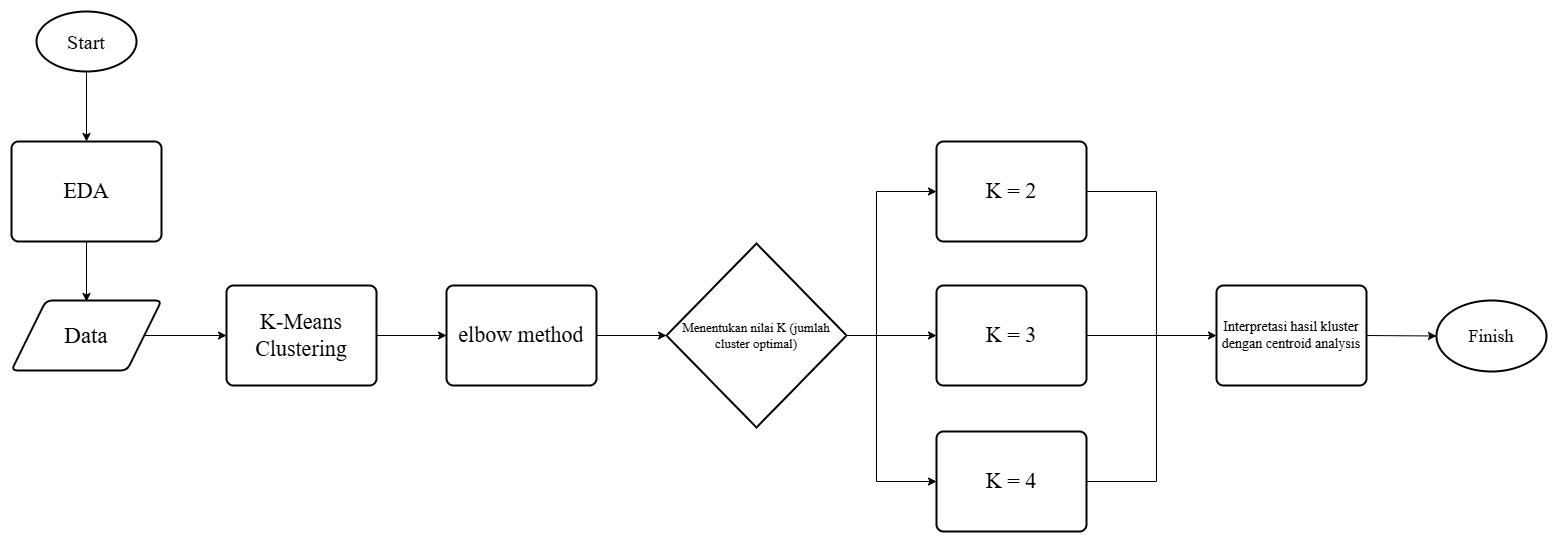

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_excel("/content/gdrive/My Drive/Colab/anmul/data_divisi_end.xlsx")
data.info()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Tipe_Divisi         500 non-null    int64
 1   Wilayah             500 non-null    int64
 2   Jumlah_Pegawai      500 non-null    int64
 3   Jam_Lembur          500 non-null    int64
 4   Biaya_Operasional   500 non-null    int64
 5   Komplain_Pelanggan  500 non-null    int64
 6   Proyek_Selesai      500 non-null    int64
 7   Pelatihan_Karyawan  500 non-null    int64
dtypes: int64(8)
memory usage: 31.4 KB


dataset memiliki 500 baris dengan 8 variabel, semua variabel bertipe integer

In [ ]:
data.head()

,Tipe_Divisi,Wilayah,Jumlah_Pegawai,Jam_Lembur,Biaya_Operasional,Komplain_Pelanggan,Proyek_Selesai,Pelatihan_Karyawan
0,0,0,140,61,228083945,12,21,19
1,1,1,63,35,45271958,65,39,17
2,0,2,301,49,382563600,36,36,5
3,0,2,165,60,412083083,176,46,2
4,2,3,161,34,472139030,65,0,12


## K-Means Clustering

In [ ]:
# check missing values
data.isna().sum()

,0
Tipe_Divisi,0
Wilayah,0
Jumlah_Pegawai,0
Jam_Lembur,0
Biaya_Operasional,0
Komplain_Pelanggan,0
Proyek_Selesai,0
Pelatihan_Karyawan,0


Semua variabel tidak memiliki missing values

In [ ]:
# check duplicates
data.duplicated().sum()

np.int64(0)

Tidak terdapat baris yang duplikat di dataset

In [ ]:
# minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.503600,0.517200,0.395000,0.489742,0.492087,0.528070,0.495673,0.528000
std,0.351446,0.334916,0.220562,0.219520,0.285616,0.291634,0.294283,0.299379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.219231,0.322581,0.244609,0.276382,0.244898,0.263158
50%,0.500000,0.600000,0.338462,0.532258,0.500601,0.537688,0.489796,0.578947
75%,0.800000,0.800000,0.562500,0.661290,0.725845,0.785176,0.739796,0.789474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Semua variabel distandarisasi pada range 0–1 meggunakan MinMaxScaler. Ini penting agar K-Means bekerja optimal dan semua variabel memiliki kontribusi setara.

# elbow method

In [ ]:
# elbow method from k=1 to k=10
from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

menghitung SSE (Sum of Squared Error) untuk 10 jumlah cluster

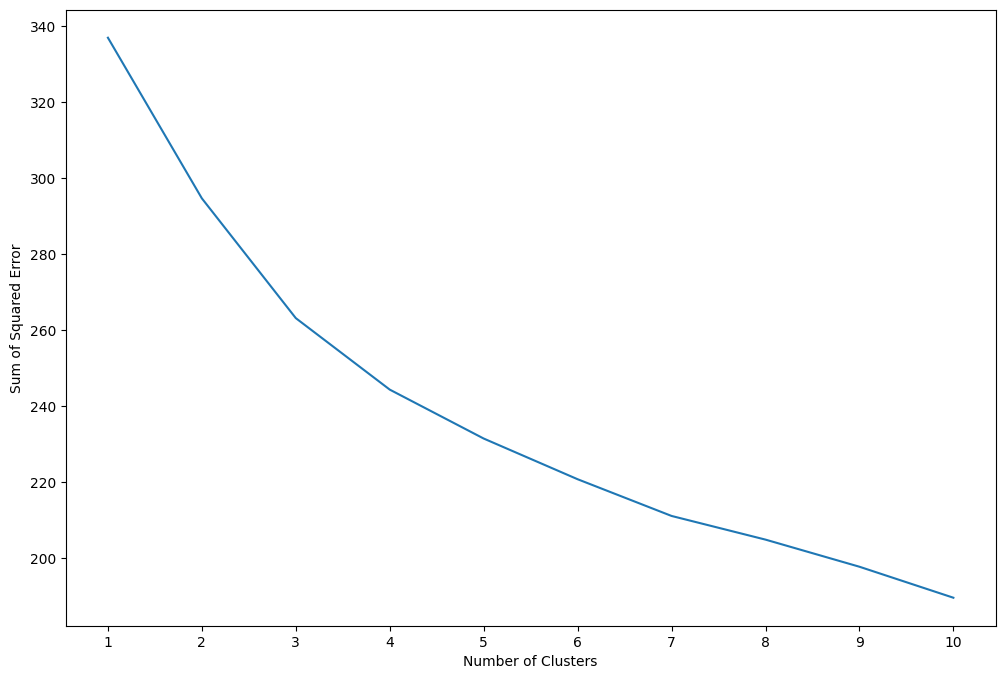

In [ ]:
# draw the SSE decline progression
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

Grafik diatas digunakan untuk mengidentifikasi titik tekukan (elbow), yaitu titik ketika penurunan SSE mulai tidak signifikan. Titik tersebut menunjukkan jumlah cluster yang optimal. Berdasarkan grafik, diperoleh nilai k optimal yaitu 3. Namun, nilai k = 2 dan k = 4 tetap digunakan sebagai pembanding untuk analisis lebih lanjut.

# Untuk k = 3

In [ ]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# assign class label to wholesale df
data["label"] = kmeans.labels_
data.head()

,Tipe_Divisi,Wilayah,Jumlah_Pegawai,Jam_Lembur,Biaya_Operasional,Komplain_Pelanggan,Proyek_Selesai,Pelatihan_Karyawan,label
0,0,0,140,61,228083945,12,21,19,2
1,1,1,63,35,45271958,65,39,17,2
2,0,2,301,49,382563600,36,36,5,2
3,0,2,165,60,412083083,176,46,2,2
4,2,3,161,34,472139030,65,0,12,1


In [ ]:
# compute mean of each feature column by group by label
data.groupby("label").mean()

,Tipe_Divisi,Wilayah,Jumlah_Pegawai,Jam_Lembur,Biaya_Operasional,Komplain_Pelanggan,Proyek_Selesai,Pelatihan_Karyawan
label,,,,,,,,
0,4.236715,2.893720,173.024155,55.743961,2.547572e+08,105.739130,24.608696,9.478261
1,1.108974,3.826923,159.794872,53.698718,2.183161e+08,107.057692,22.935897,10.551282
2,1.525547,0.708029,161.357664,56.686131,2.683075e+08,101.854015,25.343066,10.277372


Cluster 0 → jumlah pegawai terbanyak,Lembur moderat, Biaya moderat, Komplain moderat,Proyek selesai moderat,pelatihan karyawan rendah

Cluster 1 → jumlah pegawai terendah,Lembur terendah, Biaya rendah, Komplain tinggi,Proyek selesai rendah,pelatihan karyawan tinggi

Cluster 2 → jumlah pegawai moderat,Lembur tinggi, Biaya tinggi, Komplain rendah,Proyek selesai tinggi,pelatihan karyawan moderat

# Untuk k = 2

In [ ]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# assign class label to wholesale df
data["label"] = kmeans.labels_
data.head()

,Tipe_Divisi,Wilayah,Jumlah_Pegawai,Jam_Lembur,Biaya_Operasional,Komplain_Pelanggan,Proyek_Selesai,Pelatihan_Karyawan,label
0,0,0,140,61,228083945,12,21,19,0
1,1,1,63,35,45271958,65,39,17,0
2,0,2,301,49,382563600,36,36,5,0
3,0,2,165,60,412083083,176,46,2,0
4,2,3,161,34,472139030,65,0,12,1


In [ ]:
# compute mean of each feature column by group by label
data.groupby("label").mean()

,Tipe_Divisi,Wilayah,Jumlah_Pegawai,Jam_Lembur,Biaya_Operasional,Komplain_Pelanggan,Proyek_Selesai,Pelatihan_Karyawan
label,,,,,,,,
0,2.121495,0.985981,160.714953,57.420561,2.494988e+08,109.014019,23.266355,10.892523
1,2.814685,3.783217,169.430070,53.825175,2.453057e+08,102.146853,25.052448,9.388112


Cluster 0 → jumlah pegawai terendah,Lembur tinggi, Biaya tinggi, Komplain tinggi,Proyek selesai rendah,pelatihan karyawan tinggi

Cluster 1 → jumlah pegawai terbanyak,Lembur terendah, Biaya rendah, Komplain rendah,Proyek selesai tinggi,pelatihan karyawan rendah

# Untuk k = 4

In [ ]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# assign class label to wholesale df
data["label"] = kmeans.labels_
data.head()

,Tipe_Divisi,Wilayah,Jumlah_Pegawai,Jam_Lembur,Biaya_Operasional,Komplain_Pelanggan,Proyek_Selesai,Pelatihan_Karyawan,label
0,0,0,140,61,228083945,12,21,19,2
1,1,1,63,35,45271958,65,39,17,2
2,0,2,301,49,382563600,36,36,5,2
3,0,2,165,60,412083083,176,46,2,2
4,2,3,161,34,472139030,65,0,12,3


In [ ]:
# compute mean of each feature column by group by label
data.groupby("label").mean()

,Tipe_Divisi,Wilayah,Jumlah_Pegawai,Jam_Lembur,Biaya_Operasional,Komplain_Pelanggan,Proyek_Selesai,Pelatihan_Karyawan
label,,,,,,,,
0,4.245614,1.210526,174.982456,60.131579,2.063135e+08,101.298246,21.859649,10.640351
1,1.007299,3.751825,159.313869,55.496350,1.855233e+08,108.766423,21.109489,10.708029
2,0.953704,0.916667,161.453704,55.638889,2.921918e+08,103.750000,27.731481,9.481481
3,3.787234,3.843972,167.652482,51.170213,3.053691e+08,105.595745,26.702128,9.304965


Cluster 0 → jumlah pegawai terbanyak,Lembur tinggi, Biaya moderat, Komplain rendah,Proyek selesai moderat,pelatihan karyawan moderat

Cluster 1 → jumlah pegawai terendah,Lembur moderat, Biaya rendah, Komplain tinggi,Proyek selesai rendah,pelatihan karyawan tinggi

Cluster 2 → jumlah pegawai moderat,Lembur moderat, Biaya moderat, Komplain moderat,Proyek selesai tinggi,pelatihan karyawan moderat

Cluster 3 → jumlah pegawai moderat,Lembur rendah, Biaya tinggi, Komplain moderat,Proyek selesai moderat,pelatihan karyawan rendah

# KESIMPULAN

Hasil interpretasi rata-rata nilai tiap cluster pada berbagai jumlah k menunjukkan bahwa pola struktur data konsisten, yaitu adanya kelompok divisi dengan beban kerja tinggi dan komplain besar, divisi yang stabil dengan kinerja menengah, serta divisi yang sangat produktif dengan penyelesaian proyek lebih tinggi. Pada k=2, pembagian bersifat sangat umum sehingga hanya memisahkan divisi berkinerja baik dan bermasalah. Pada k=4, segmentasi menjadi lebih detail tetapi mulai menimbulkan tumpang tindih sehingga kurang efisien untuk pengambilan keputusan. Nilai k=3 memberikan segmentasi yang paling seimbang dan paling representatif, karena mampu membedakan divisi berdasarkan kualitas layanan, produktivitas, dan beban operasional secara jelas dan proporsional, sehingga dianggap sebagai jumlah cluster yang optimal untuk analisis.